In [5]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sessions = pd.read_csv("sessions.csv")
transactions = pd.read_csv("transactions.csv")

In [8]:
display(sessions.head(1), transactions.head(1))

,user_id,session_id
0,005aCVlvg3,MlzFr96U43PlPv5


,conversion,session_id,session_dt,num_impressions,avg_relevance,num_search,train,score,test
0,False,JtAYcYYL7cU7rnY,2018-09-13,1,0.833254,0,True,False,False


In [9]:
# Exploration of each features
# sessions
len(sessions['user_id'].unique()), len(sessions['session_id'].unique())

(15500, 46787)

In [10]:
# transactions
len(transactions['session_id'].unique())

46287

In [11]:
# join two table
df = transactions.merge(sessions, how = 'left', on = 'session_id')
# check transaction table
display(df.head(1), len(df['user_id'].unique()))

,conversion,session_id,session_dt,num_impressions,avg_relevance,num_search,train,score,test,user_id
0,False,JtAYcYYL7cU7rnY,2018-09-13,1,0.833254,0,True,False,False,s2v2cKUft9


15000

In [12]:
df.columns

Index(['conversion', 'session_id', 'session_dt', 'num_impressions',
       'avg_relevance', 'num_search', 'train', 'score', 'test', 'user_id'],
      dtype='object')

In [13]:
# sessions per user
df.shape[0]/len(df['user_id'].unique())

3.0858

In [14]:
df.groupby(['conversion']).size().to_frame().rename(columns = {0:'count'})

,count
conversion,
False,38787
True,7500


In [15]:
# for the converted group
display(df[df['conversion'] == 1].describe())

# for the non-converted group
display(df[df['conversion'] == 0].describe())

,num_impressions,avg_relevance,num_search
count,7500.000000,7500.000000,7500.000000
mean,6.935867,0.676161,3.251600
std,2.429761,0.211459,1.495258
min,1.000000,0.200369,0.000000
25%,5.000000,0.515020,2.000000
50%,7.000000,0.698738,3.000000
75%,9.000000,0.856070,4.000000
max,10.000000,0.999793,6.000000


,num_impressions,avg_relevance,num_search
count,38787.000000,38787.000000,38787.000000
mean,5.090933,0.579790,2.495553
std,2.911544,0.233995,1.700913
min,0.000000,0.000144,0.000000
25%,3.000000,0.377996,1.000000
50%,5.000000,0.571755,2.000000
75%,8.000000,0.778338,4.000000
max,10.000000,0.999971,7.000000


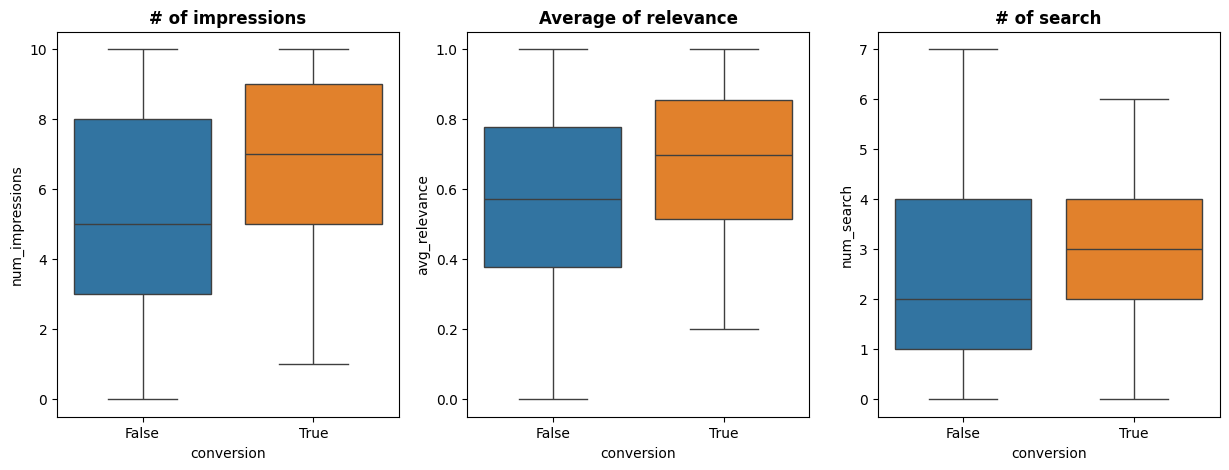

In [16]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(ax=ax[0], data = df, y='num_impressions', x="conversion", hue = 'conversion')
sns.boxplot(ax=ax[1], data = df, y='avg_relevance', x="conversion", hue = 'conversion')
sns.boxplot(ax=ax[2], data = df, y='num_search', x="conversion", hue = 'conversion')

ax[0].set_title("# of impressions", fontweight='bold')
ax[1].set_title("Average of relevance", fontweight='bold')
ax[2].set_title("# of search", fontweight='bold')

ax[0].legend().remove()
ax[1].legend().remove()
ax[2].legend().remove()
# sns.histplot(data=df, x="num_impressions", bins = 5, hue="conversion")

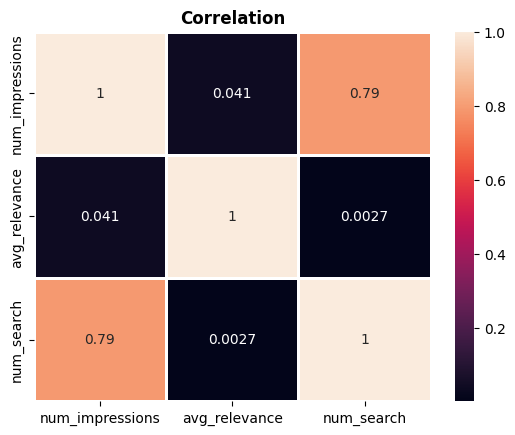

In [17]:
corr_df = df[['num_impressions','avg_relevance', 'num_search']].corr()
sns.heatmap(data = corr_df, annot = True, linewidths = 1)
plt.title('Correlation', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, "Users Who didn't converted (False)")

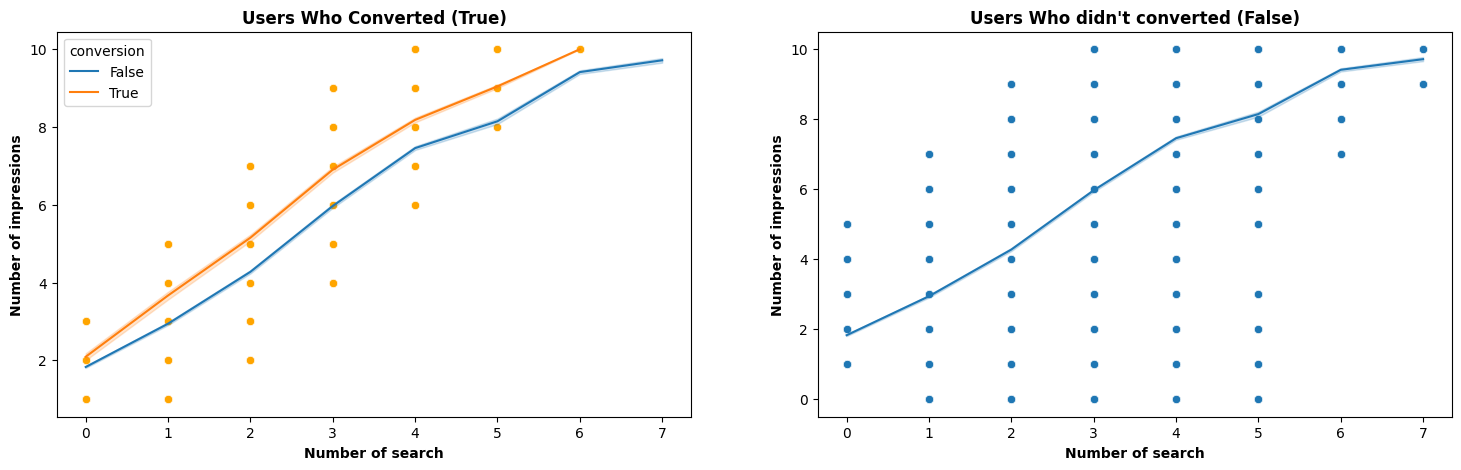

In [18]:
fig, ax = plt.subplots(1,2, figsize = (18,5))

sns.scatterplot(ax=ax[0], data = df[df['conversion'] == 1], y='num_impressions', x='num_search', color = 'orange')
sns.lineplot(ax=ax[0], data = df, y='num_impressions', x='num_search', hue = 'conversion')
sns.scatterplot(ax=ax[1], data = df[df['conversion'] == 0], y='num_impressions', x='num_search')
sns.lineplot(ax=ax[1], data = df[df['conversion'] == 0], y='num_impressions', x='num_search')

ax[0].set_xlabel('Number of search', fontweight='bold')
ax[0].set_ylabel('Number of impressions', fontweight='bold')
ax[0].set_title('Users Who Converted (True)', fontweight='bold')

ax[1].set_xlabel('Number of search', fontweight='bold')
ax[1].set_ylabel('Number of impressions', fontweight='bold')
ax[1].set_title("Users Who didn't converted (False)", fontweight='bold')


In [19]:
# date range
df['session_dt'] = pd.to_datetime(df['session_dt'])
df['session_dt'].max()-df['session_dt'].min()

Timedelta('148 days 00:00:00')

In [20]:
df['session_dt_m'] = df['session_dt'].dt.strftime('%Y-%m')
df['session_dt'].max(), df['session_dt'].min()

(Timestamp('2018-11-26 00:00:00'), Timestamp('2018-07-01 00:00:00'))

In [21]:
# Calculate daily log returns using log() and diff()
data_df = df.groupby(['session_dt_m']).agg({'num_impressions': 'mean',
                                      'avg_relevance':'mean',
                                      'num_search':'mean'})

data_df

,num_impressions,avg_relevance,num_search
session_dt_m,,,
2018-07,5.169811,0.581245,2.694683
2018-08,5.429320,0.596759,2.613859
2018-09,5.410440,0.597332,2.609826
2018-10,1.495238,0.422693,3.014286
2018-11,1.600000,0.337021,3.000000


In [22]:
count_tf = df.groupby(['session_dt_m','conversion']).size().to_frame()
count_tf = count_tf.reset_index().rename(columns={0:'count'})
count_tf

,session_dt_m,conversion,count
0,2018-07,False,2332
1,2018-08,False,19894
2,2018-08,True,3960
3,2018-09,False,16346
4,2018-09,True,3540
5,2018-10,False,210
6,2018-11,False,5


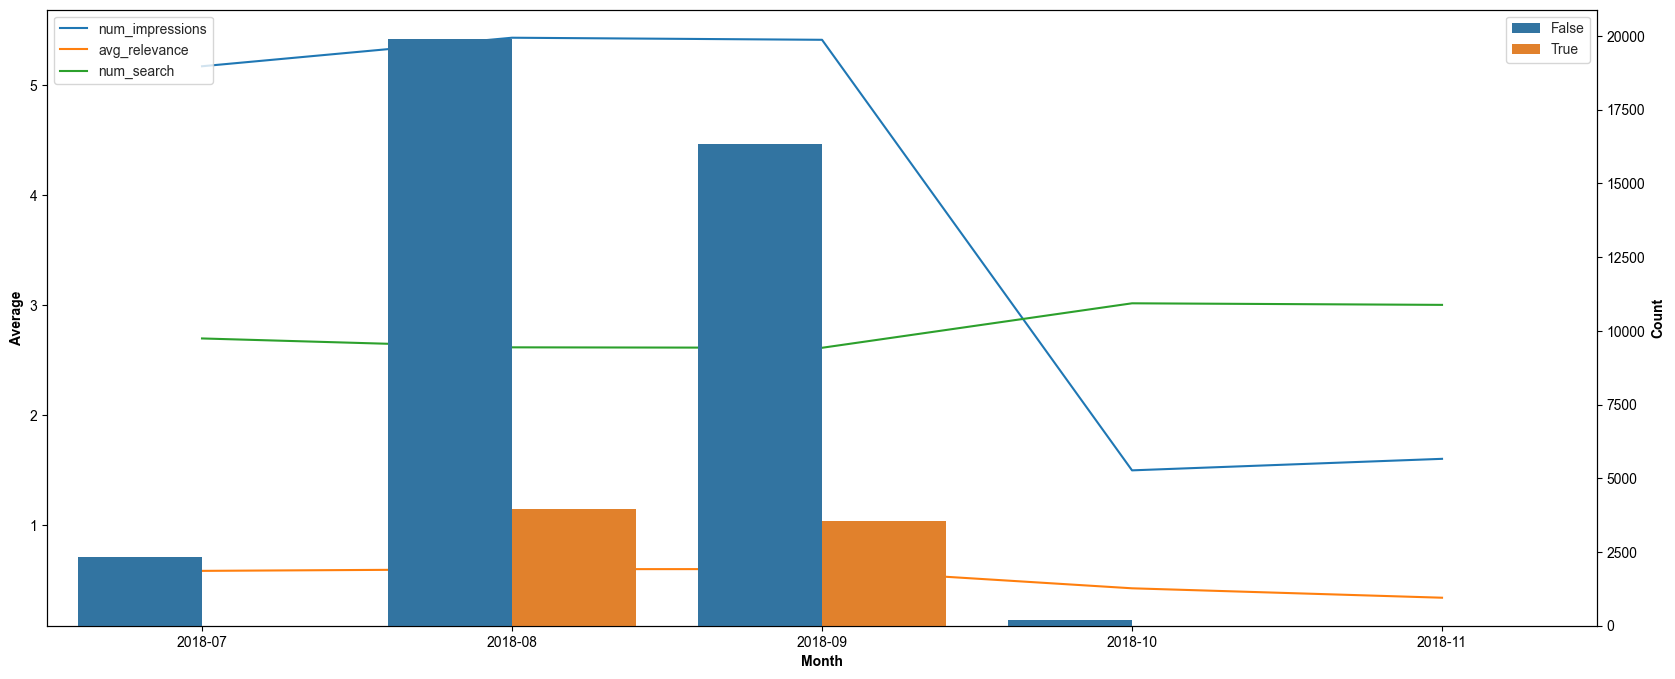

In [23]:
import numpy as np
# Plot returns

# Create a single figure with two y-axes
fig, ax1 = plt.subplots(figsize=(20, 8))
# sns.set(font_scale=1.5)
# Line plots for num_impressions, avg_relevance, and num_search on the left y-axis
sns.lineplot(data=data_df, x=data_df.index, y='num_impressions', label='num_impressions', ax=ax1)
sns.lineplot(data=data_df, x=data_df.index, y='avg_relevance', label='avg_relevance', ax=ax1)
sns.lineplot(data=data_df, x=data_df.index, y='num_search', label='num_search', ax=ax1)

# Bar plot with color-coded 'Conversion' using hue on the right y-axis
ax2 = ax1.twinx()
sns.barplot(data=count_tf, x='session_dt_m', y='count', hue='conversion', ax=ax2)
sns.set_style("ticks")
# Show the legend
ax1.legend(loc='upper left')
ax2.get_legend()
ax2.legend(loc='upper right')
# Display the plot

ax1.set_xlabel('Month', fontweight='bold')
ax1.set_ylabel('Average', fontweight='bold')
ax2.set_ylabel('Count', fontweight='bold')
plt.show()

In [24]:
### by day

In [25]:
df['session_dt_d'] = df['session_dt'].dt.strftime('%Y-%m-%d')
df['session_dt'].max(), df['session_dt'].min()

(Timestamp('2018-11-26 00:00:00'), Timestamp('2018-07-01 00:00:00'))

In [26]:
# Calculate daily log returns using log() and diff()
data_df = df.groupby(['session_dt_d']).agg({'num_impressions': 'mean',
                                      'avg_relevance':'mean',
                                      'num_search':'mean'})

data_df

,num_impressions,avg_relevance,num_search
session_dt_d,,,
2018-07-01,0.000000,0.388516,4.000000
2018-07-03,2.000000,0.172376,2.000000
2018-07-04,1.666667,0.401110,3.333333
2018-07-05,2.500000,0.781155,3.500000
2018-07-06,1.714286,0.272143,3.428571
...,...,...,...
2018-10-29,1.000000,0.058048,4.000000
2018-11-01,1.000000,0.486954,2.000000
2018-11-03,2.000000,0.210147,4.500000


In [27]:
count_tf = df.groupby(['session_dt_d','conversion']).size().to_frame()
count_tf = count_tf.reset_index().rename(columns={0:'count'})
count_tf_sum = count_tf.groupby(['session_dt_d'])['count'].sum().to_frame().rename(columns={'count' : 'count_sum'})
count_tf = count_tf.merge(count_tf_sum, how = 'left', on='session_dt_d')
count_tf['per'] = count_tf['count'] / count_tf['count_sum']
count_tf

,session_dt_d,conversion,count,count_sum,per
0,2018-07-01,False,1,1,1.0
1,2018-07-03,False,2,2,1.0
2,2018-07-04,False,3,3,1.0
3,2018-07-05,False,2,2,1.0
4,2018-07-06,False,7,7,1.0
...,...,...,...,...,...
178,2018-10-29,False,1,1,1.0
179,2018-11-01,False,1,1,1.0
180,2018-11-03,False,2,2,1.0
181,2018-11-08,False,1,1,1.0


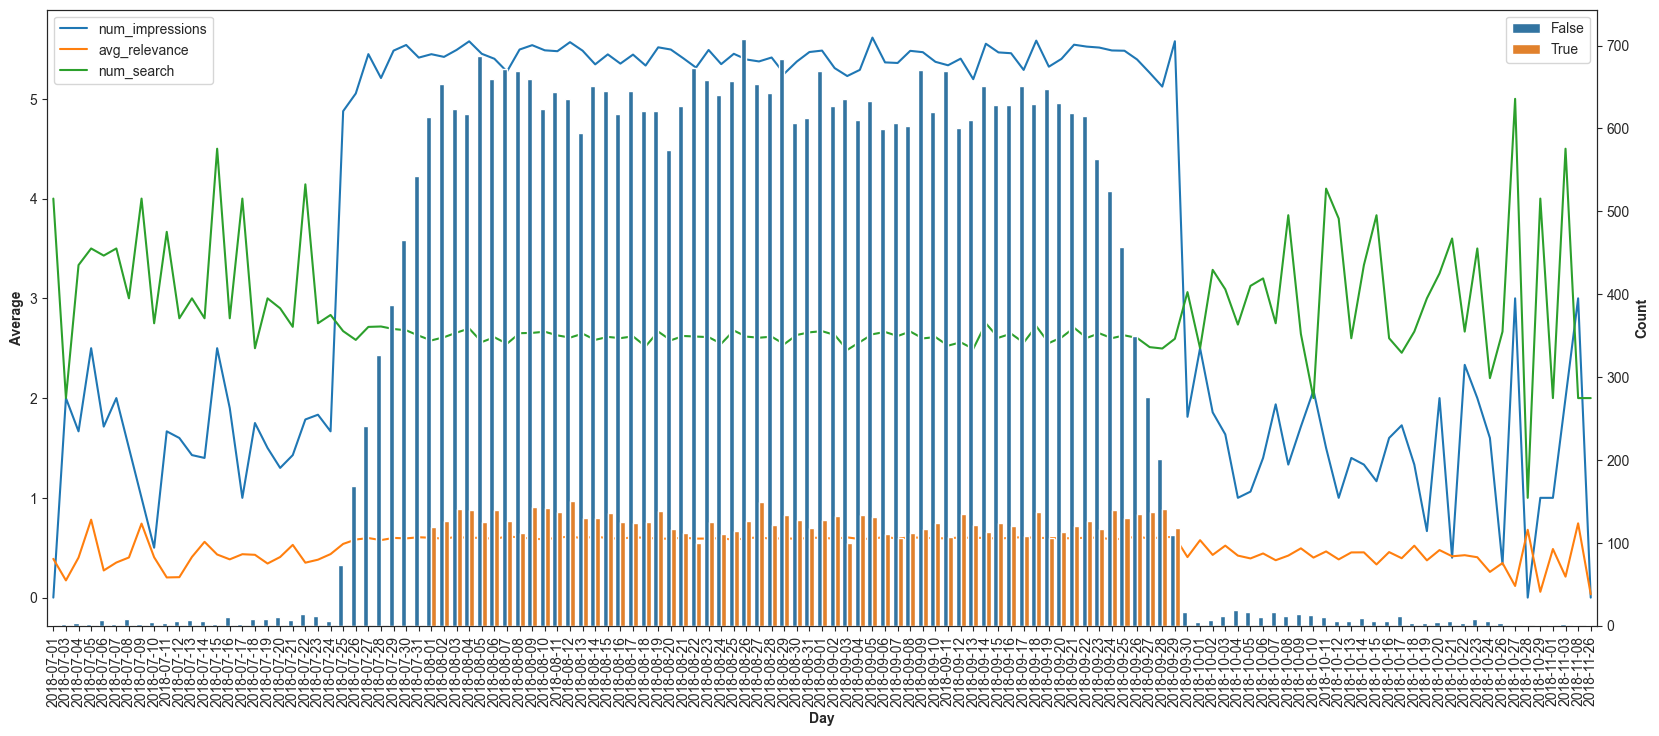

In [28]:
import numpy as np
# Plot returns

# Create a single figure with two y-axes
fig, ax1 = plt.subplots(figsize=(20, 8))
# Line plots for num_impressions, avg_relevance, and num_search on the left y-axis
sns.lineplot(data=data_df, x=data_df.index, y='num_impressions', label='num_impressions', ax=ax1)
sns.lineplot(data=data_df, x=data_df.index, y='avg_relevance', label='avg_relevance', ax=ax1)
sns.lineplot(data=data_df, x=data_df.index, y='num_search', label='num_search', ax=ax1)

# Bar plot with color-coded 'Conversion' using hue on the right y-axis
ax2 = ax1.twinx()
ax2 = sns.barplot(data=count_tf, x='session_dt_d', y='count', hue='conversion', ax=ax2)
# sns.set_style("ticks")
# Show the legend
ax1.legend(loc='upper left')
ax2.get_legend()
ax2.legend(loc='upper right')

ax1.set_xticks(data_df.index)
ax1.set_xticklabels(data_df.index, minor=False, rotation=90)

ax1.set_xlabel('Day', fontweight='bold')
ax1.set_ylabel('Average', fontweight='bold')
ax2.set_ylabel('Count', fontweight='bold')
# Display the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


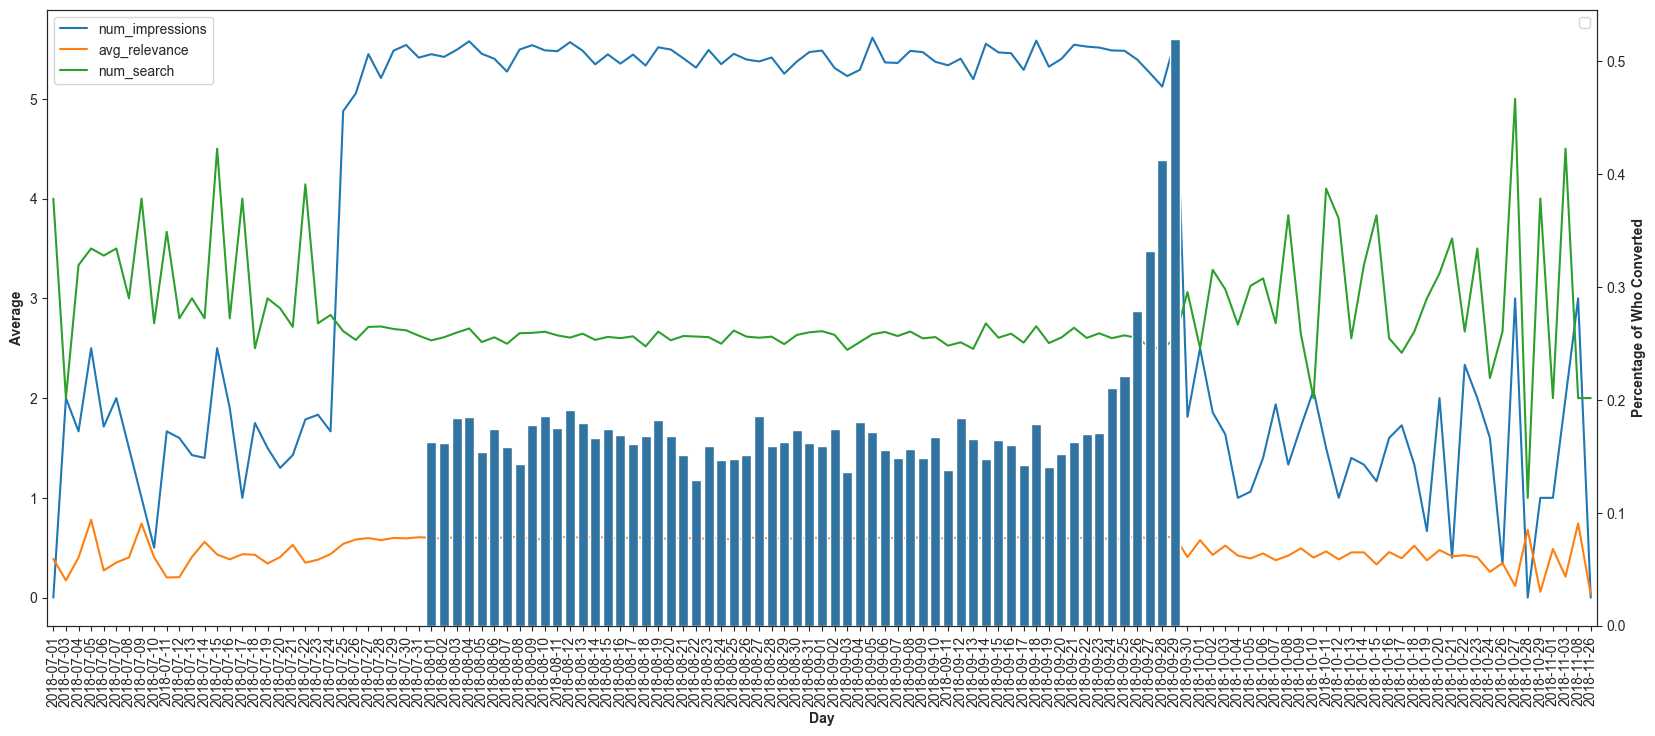

In [29]:
import numpy as np
# Plot returns

# Create a single figure with two y-axes
fig, ax1 = plt.subplots(figsize=(20, 8))
# sns.set(font_scale=1.5)
# Line plots for num_impressions, avg_relevance, and num_search on the left y-axis
sns.lineplot(data=data_df, x=data_df.index, y='num_impressions', label='num_impressions', ax=ax1)
sns.lineplot(data=data_df, x=data_df.index, y='avg_relevance', label='avg_relevance', ax=ax1)
sns.lineplot(data=data_df, x=data_df.index, y='num_search', label='num_search', ax=ax1)

# Bar plot with color-coded 'Conversion' using hue on the right y-axis
ax2 = ax1.twinx()
ax2 = sns.barplot(data=count_tf[count_tf['conversion'] == True], x='session_dt_d', y='per', ax=ax2)
# sns.set_style("ticks")
# Show the legend
ax1.legend(loc='upper left')
ax2.get_legend()
ax2.legend(loc='upper right')

ax1.set_xticks(data_df.index)
ax1.set_xticklabels(data_df.index, minor=False, rotation=90)

ax1.set_xlabel('Day', fontweight='bold')
ax1.set_ylabel('Average', fontweight='bold')
ax2.set_ylabel('Percentage of Who Converted', fontweight='bold')
# Display the plot
plt.show()

In [30]:
df.columns

Index(['conversion', 'session_id', 'session_dt', 'num_impressions',
       'avg_relevance', 'num_search', 'train', 'score', 'test', 'user_id',
       'session_dt_m', 'session_dt_d'],
      dtype='object')

In [31]:
df1 = df.groupby(['user_id','session_dt','conversion']).agg({'num_impressions':'sum',
                                                             'num_search':'sum'}).reset_index()
df1['csum_imp'] = df1.groupby(['user_id'])['num_impressions'].cumsum()
df1['csum_sea'] = df1.groupby(['user_id'])['num_search'].cumsum()
df1['time'] = 1
df1['c_count'] = df1.groupby(['user_id'])['time'].cumsum()
df1

,user_id,session_dt,conversion,num_impressions,num_search,csum_imp,csum_sea,time,c_count
0,005aCVlvg3,2018-09-23,False,7,5,7,5,1,1
1,005aCVlvg3,2018-09-24,False,3,0,10,5,1,2
2,005aCVlvg3,2018-09-25,True,4,3,14,8,1,3
3,00CFAV3zZI,2018-07-30,False,8,3,8,3,1,1
4,00CFAV3zZI,2018-07-31,False,3,1,11,4,1,2
...,...,...,...,...,...,...,...,...,...
44106,zz54P5hcKK,2018-09-07,False,9,4,13,5,1,2
44107,zz54P5hcKK,2018-09-12,False,2,1,15,6,1,3
44108,zzUp95llRz,2018-08-17,False,7,2,7,2,1,1
44109,zzUp95llRz,2018-08-19,False,8,4,15,6,1,2


In [32]:
df = df.merge(df1[['user_id',	'session_dt',	'conversion','csum_imp','csum_sea','c_count']], how='left', on = ['user_id',	'session_dt',	'conversion'])
df.columns

Index(['conversion', 'session_id', 'session_dt', 'num_impressions',
       'avg_relevance', 'num_search', 'train', 'score', 'test', 'user_id',
       'session_dt_m', 'session_dt_d', 'csum_imp', 'csum_sea', 'c_count'],
      dtype='object')

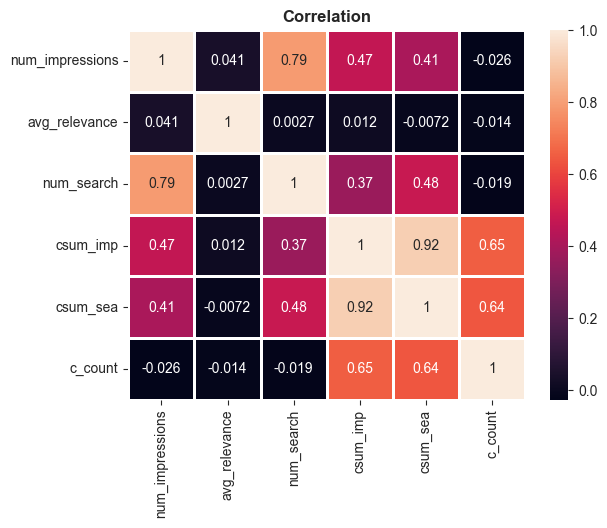

In [33]:
corr_df1 = df[['num_impressions','avg_relevance', 'num_search','csum_imp','csum_sea','c_count']].corr()
sns.heatmap(data = corr_df1, annot = True, linewidths = 1)
plt.title('Correlation', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, "Users Who didn't converted (False)")

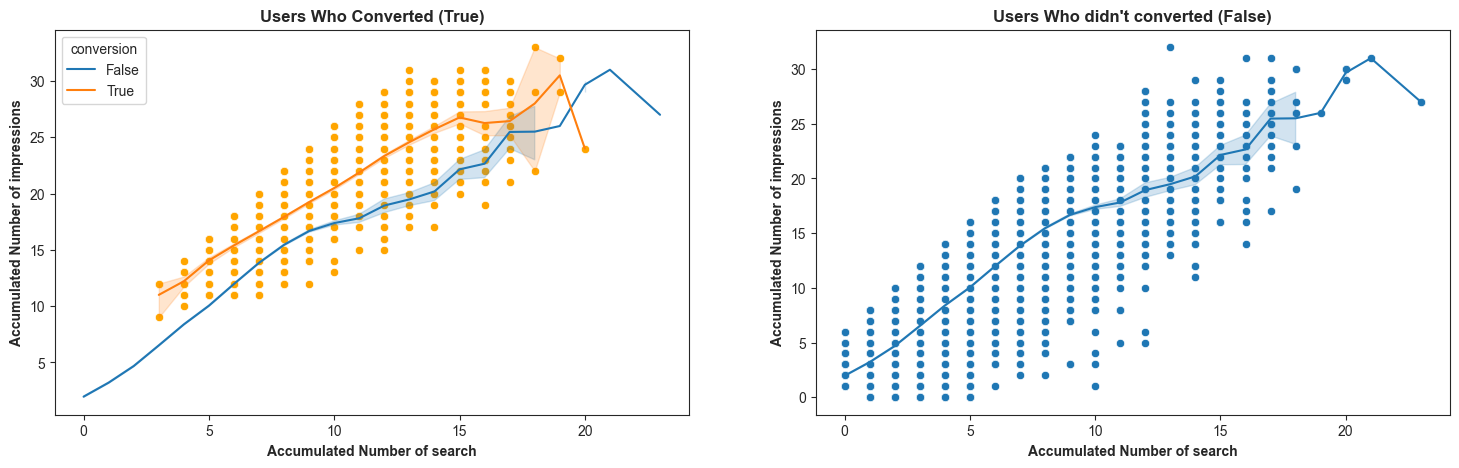

In [34]:
fig, ax = plt.subplots(1,2, figsize = (18,5))

sns.scatterplot(ax=ax[0], data = df[df['conversion'] == 1], y='csum_imp', x='csum_sea', color = 'orange')
sns.lineplot(ax=ax[0], data = df, y='csum_imp', x='csum_sea', hue = 'conversion')
sns.scatterplot(ax=ax[1], data = df[df['conversion'] == 0], y='csum_imp', x='csum_sea')
sns.lineplot(ax=ax[1], data = df[df['conversion'] == 0], y='csum_imp', x='csum_sea')

ax[0].set_xlabel('Accumulated Number of search', fontweight='bold')
ax[0].set_ylabel('Accumulated Number of impressions', fontweight='bold')
ax[0].set_title('Users Who Converted (True)', fontweight='bold')

ax[1].set_xlabel('Accumulated Number of search', fontweight='bold')
ax[1].set_ylabel('Accumulated Number of impressions', fontweight='bold')
ax[1].set_title("Users Who didn't converted (False)", fontweight='bold')

In [35]:
df[df['conversion'] == 1]['csum_imp'].min(),df[df['conversion'] == 1]['csum_imp'].max(),df[df['conversion'] == 1]['csum_sea'].min(),df[df['conversion'] == 1]['csum_sea'].max()

(9, 33, 3, 20)

((array([ 153., 2308., 3778., 1195.,   66.]),
  array([ 9. , 13.8, 18.6, 23.4, 28.2, 33. ]),
  <BarContainer object of 5 artists>),
 (array([ 479., 3110., 3579.,  310.,   22.]),
  array([ 3. ,  6.4,  9.8, 13.2, 16.6, 20. ]),
  <BarContainer object of 5 artists>))

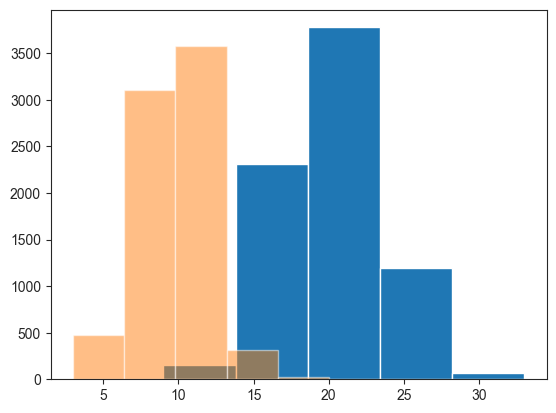

In [36]:
plt.hist(df[df['conversion'] == 1]['csum_imp'],bins = 5),plt.hist(df[df['conversion'] == 1]['csum_sea'],alpha = 0.5,bins = 5)

In [37]:
df[df['conversion'] == 0]['csum_imp'].min(),df[df['conversion'] == 0]['csum_imp'].max(),df[df['conversion'] == 0]['csum_sea'].min(),df[df['conversion'] == 0]['csum_sea'].max()

(0, 32, 0, 23)

((array([11111., 16436., 10587.,   603.,    50.]),
  array([ 0. ,  6.4, 12.8, 19.2, 25.6, 32. ]),
  <BarContainer object of 5 artists>),
 (array([1.8712e+04, 1.8588e+04, 1.3030e+03, 1.7700e+02, 7.0000e+00]),
  array([ 0. ,  4.6,  9.2, 13.8, 18.4, 23. ]),
  <BarContainer object of 5 artists>))

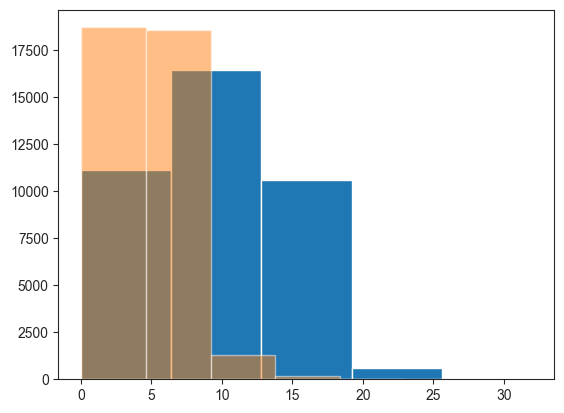

In [38]:
plt.hist(df[df['conversion'] == 0]['csum_imp'], bins = 5),plt.hist(df[df['conversion'] == 0]['csum_sea'], alpha = 0.5,bins = 5)

In [39]:
# Define the bin edges and labels
bin_edges = [0, 5, 10, 15, 20, 25, 30, float('inf')]
bin_labels = [1, 2, 3, 4, 5, 6, 7]
df['imp_bin'] = pd.cut(df['csum_imp'], bins=bin_edges, labels=bin_labels)
df['imp_bin'] = df['imp_bin'].fillna(1)
df['imp_bin'] = df['imp_bin'].astype('int')

In [40]:
# df['imprxrel'] = df['num_impressions'] * df['avg_relevance']

In [41]:
df.to_csv('df_eng.csv')

## Baseline Model

In [42]:
store_result = pd.DataFrame({'Model':[],
                             'trainScore':[],
                             'testSocre':[],
                             'AUC':[]})
store_result

,Model,trainScore,testSocre,AUC


In [43]:
# split the data
train_df = df[df['train'] == 1]
test_df = df[df['train'] == 0]

train_df.shape, test_df.shape

((31287, 16), (15000, 16))

In [44]:
train_x = train_df.copy().loc[:,['num_impressions','avg_relevance', 'num_search']]
train_y = train_df.copy().iloc[:,0]

In [45]:
test_x = test_df.copy().loc[:,['num_impressions','avg_relevance', 'num_search']]
test_y = test_df.copy().iloc[:,0]

In [55]:
# !pip install -U scikit-learn

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [58]:
logreg = LogisticRegression().fit(train_x,train_y)
logreg

print("Training set score: {:.4f}".format(logreg.score(train_x,train_y)))
print("Test set score: {:.4f}".format(logreg.score(test_x,test_y)))

print('=======================================')
print('coef: ')
for idx, n in enumerate(list(test_x.columns)):

  print(n, '{:.4f}'.format(logreg.coef_[0][idx]))
print('=======================================')
print('intercept: \n{:.4f}'.format(logreg.intercept_[0]))

print('=======================================')
print('AUC: ')
print('{:.4f}'.format(roc_auc_score(train_y, logreg.predict_proba(train_x)[:, 1])))


Training set score: 0.8368
Test set score: 0.8371
coef: 
num_impressions 0.2925
avg_relevance 1.8971
num_search -0.1148
intercept: 
-4.2703
AUC: 
0.7236


In [59]:
Modelbaseline = [ list(train_x.columns), logreg.score(train_x,train_y), 
           logreg.score(test_x,test_y),
           roc_auc_score(train_y, logreg.predict_proba(train_x)[:, 1])]

Modelbaseline_df = pd.DataFrame([Modelbaseline], columns=store_result.columns, index=['Modelbaseline'])
store_result = pd.concat([store_result, Modelbaseline_df])
store_result

,Model,trainScore,testSocre,AUC
Modelbaseline,"[num_impressions, avg_relevance, num_search]",0.836833,0.837067,0.723637


In [60]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_y, logreg.predict(test_x)))
# print classification report
print(classification_report(test_y, logreg.predict(test_x)))

[[12544    26]
 [ 2418    12]]
              precision    recall  f1-score   support

       False       0.84      1.00      0.91     12570
        True       0.32      0.00      0.01      2430

    accuracy                           0.84     15000
   macro avg       0.58      0.50      0.46     15000
weighted avg       0.75      0.84      0.77     15000



## Model Exploration

### Model1

In [61]:
train_x_1 = train_df.copy().loc[:,['num_impressions','avg_relevance', 'num_search','csum_imp']]
train_y_1 = train_df.copy().iloc[:,0]

In [62]:
test_x_1 = test_df.copy().loc[:,['num_impressions','avg_relevance', 'num_search','csum_imp']]
test_y_1 = test_df.copy().iloc[:,0]

In [63]:
logreg1 = LogisticRegression().fit(train_x_1,train_y_1)
logreg1

print("Training set score: {:.4f}".format(logreg1.score(train_x_1,train_y_1)))
print("Test set score: {:.4f}".format(logreg1.score(test_x_1,test_y_1)))

print('=======================================')
print('coef: ')
for idx, n in enumerate(list(test_x_1.columns)):

  print(n, '{:.4f}'.format(logreg1.coef_[0][idx]))
print('=======================================')
print('intercept: \n{:.4f}'.format(logreg1.intercept_[0]))

print('=======================================')
print('AUC: ')
print('{:.4f}'.format(roc_auc_score(train_y_1, logreg1.predict_proba(train_x_1)[:, 1])))

Training set score: 0.9302
Test set score: 0.9363
coef: 
num_impressions 0.1906
avg_relevance 5.2237
num_search -0.4424
csum_imp 0.7000
intercept: 
-15.8551
AUC: 
0.9743


In [64]:
Model1 = [ list(train_x_1.columns), logreg1.score(train_x_1,train_y_1), 
           logreg1.score(test_x_1,test_y_1),
           roc_auc_score(train_y_1, logreg1.predict_proba(train_x_1)[:, 1])]

Model1_df = pd.DataFrame([Model1], columns=store_result.columns, index=['Model1'])
store_result = pd.concat([store_result, Model1_df])
store_result

,Model,trainScore,testSocre,AUC
Modelbaseline,"[num_impressions, avg_relevance, num_search]",0.836833,0.837067,0.723637
Model1,"[num_impressions, avg_relevance, num_search, c...",0.930163,0.936333,0.974302


In [65]:
# print classification report
print(confusion_matrix(test_y_1, logreg1.predict(test_x_1)))
print(classification_report(test_y_1, logreg1.predict(test_x_1)))

[[12254   316]
 [  639  1791]]
              precision    recall  f1-score   support

       False       0.95      0.97      0.96     12570
        True       0.85      0.74      0.79      2430

    accuracy                           0.94     15000
   macro avg       0.90      0.86      0.88     15000
weighted avg       0.93      0.94      0.93     15000



### Model2

In [66]:
train_x_2 = train_df.copy().loc[:,['num_impressions','avg_relevance', 'num_search','csum_imp','c_count']]
train_y_2 = train_df.copy().iloc[:,0]

In [67]:
test_x_2 = test_df.copy().loc[:,['num_impressions','avg_relevance', 'num_search','csum_imp','c_count']]
test_y_2 = test_df.copy().iloc[:,0]

In [68]:
logreg2 = LogisticRegression().fit(train_x_2,train_y_2)
logreg2

print("Training set score: {:.4f}".format(logreg2.score(train_x_2,train_y_2)))
print("Test set score: {:.4f}".format(logreg2.score(test_x_2,test_y_2)))

print('=======================================')
print('coef: ')
for idx, n in enumerate(list(test_x_2.columns)):

  print(n, '{:.4f}'.format(logreg2.coef_[0][idx]))
print('=======================================')
print('intercept: \n{:.4f}'.format(logreg2.intercept_[0]))

print('=======================================')
print('AUC: ')
print('{:.4f}'.format(roc_auc_score(train_y_2, logreg2.predict_proba(train_x_2)[:, 1])))

Training set score: 0.9411
Test set score: 0.9464
coef: 
num_impressions 0.3936
avg_relevance 5.9065
num_search -0.5478
csum_imp 0.6366
c_count 1.5096
intercept: 
-20.1645
AUC: 
0.9801


In [69]:
# print classification report
print(confusion_matrix(test_y_2, logreg2.predict(test_x_2)))
print(classification_report(test_y_2, logreg2.predict(test_x_2)))

[[12329   241]
 [  563  1867]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97     12570
        True       0.89      0.77      0.82      2430

    accuracy                           0.95     15000
   macro avg       0.92      0.87      0.90     15000
weighted avg       0.94      0.95      0.94     15000



In [70]:
roc_auc_score(test_y_2, logreg2.predict_proba(test_x_2)[:, 1])

0.9851476014156119

In [71]:
Model2 = [ list(train_x_2.columns), logreg2.score(train_x_2,train_y_2), 
           logreg2.score(test_x_2,test_y_2),
           roc_auc_score(train_y_2, logreg2.predict_proba(train_x_2)[:, 1])]

Model2_df = pd.DataFrame([Model2], columns=store_result.columns, index=['Model2'])
store_result = pd.concat([store_result, Model2_df])
store_result

,Model,trainScore,testSocre,AUC
Modelbaseline,"[num_impressions, avg_relevance, num_search]",0.836833,0.837067,0.723637
Model1,"[num_impressions, avg_relevance, num_search, c...",0.930163,0.936333,0.974302
Model2,"[num_impressions, avg_relevance, num_search, c...",0.941094,0.946400,0.980083


### Model 3

In [72]:
# train_x_3 = train_df.copy().loc[:,['num_impressions','avg_relevance', 'num_search','imprxrel','csum_imp','c_count']]
# train_y_3 = train_df.copy().iloc[:,0]

In [73]:
# test_x_3 = test_df.copy().loc[:,['num_impressions','avg_relevance', 'num_search','imprxrel','csum_imp','c_count']]
# test_y_3 = test_df.copy().iloc[:,0]

In [74]:
# logreg3 = LogisticRegression().fit(train_x_3,train_y_3)
# logreg3

# print("Training set score: {:.4f}".format(logreg3.score(train_x_3,train_y_3)))
# print("Test set score: {:.4f}".format(logreg3.score(test_x_3,test_y_3)))

# print('=======================================')
# print('coef: ')
# for idx, n in enumerate(list(test_x_3.columns)):

#   print(n, '{:.4f}'.format(logreg3.coef_[0][idx]))
# print('=======================================')
# print('intercept: \n{:.4f}'.format(logreg3.intercept_[0]))

# print('=======================================')
# print('AUC: ')
# print('{:.4f}'.format(roc_auc_score(train_y_3, logreg3.predict_proba(train_x_3)[:, 1])))